In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from dmd import Dmd1d
from simulation import Simulation1d

# Sideview of DMD with a few mirrors

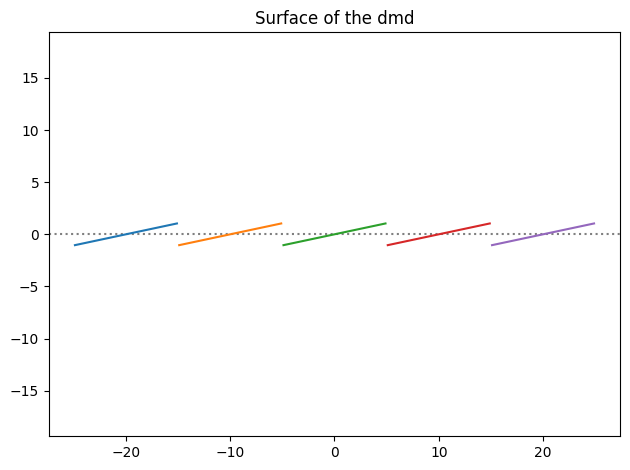

In [18]:
dmd_test = Dmd1d(12, 10, 0, 5, 10)
dmd_test.display_dmd()

# Simulation setup

In [19]:
# initiate dmd
dmd = Dmd1d(tilt_angle=12,
           mirror_size=6, 
           mirror_gap=0.1, 
           nr_x=3,
           nr_sources_per_mirror=30)

# initiate simulation
sim = Simulation1d(dmd=dmd,
                 incident_angle=90,
                 wavelength=3,
                 field_dimensions=(25, 25),
                 res=50,
                 source_type="plane")

sim.display_field()
plt.show()

TypeError: Simulation1d.display_field() missing 1 required positional argument: 'E_total'

In [11]:
# initiate dmd
dmd_one_mirror = Dmd1d(
    tilt_angle=12,
    mirror_size=20, 
    mirror_gap=1, 
    nr_x=1,
    nr_sources_per_mirror=60
)

sim_one_mirror = Simulation1d(
    dmd=dmd_one_mirror,
    incident_angle=90,
    wavelength=2,
    field_dimensions=(25, 25),
    res=50,
    source_type="plane"
)

E_total = sim_one_mirror.get_E_total()


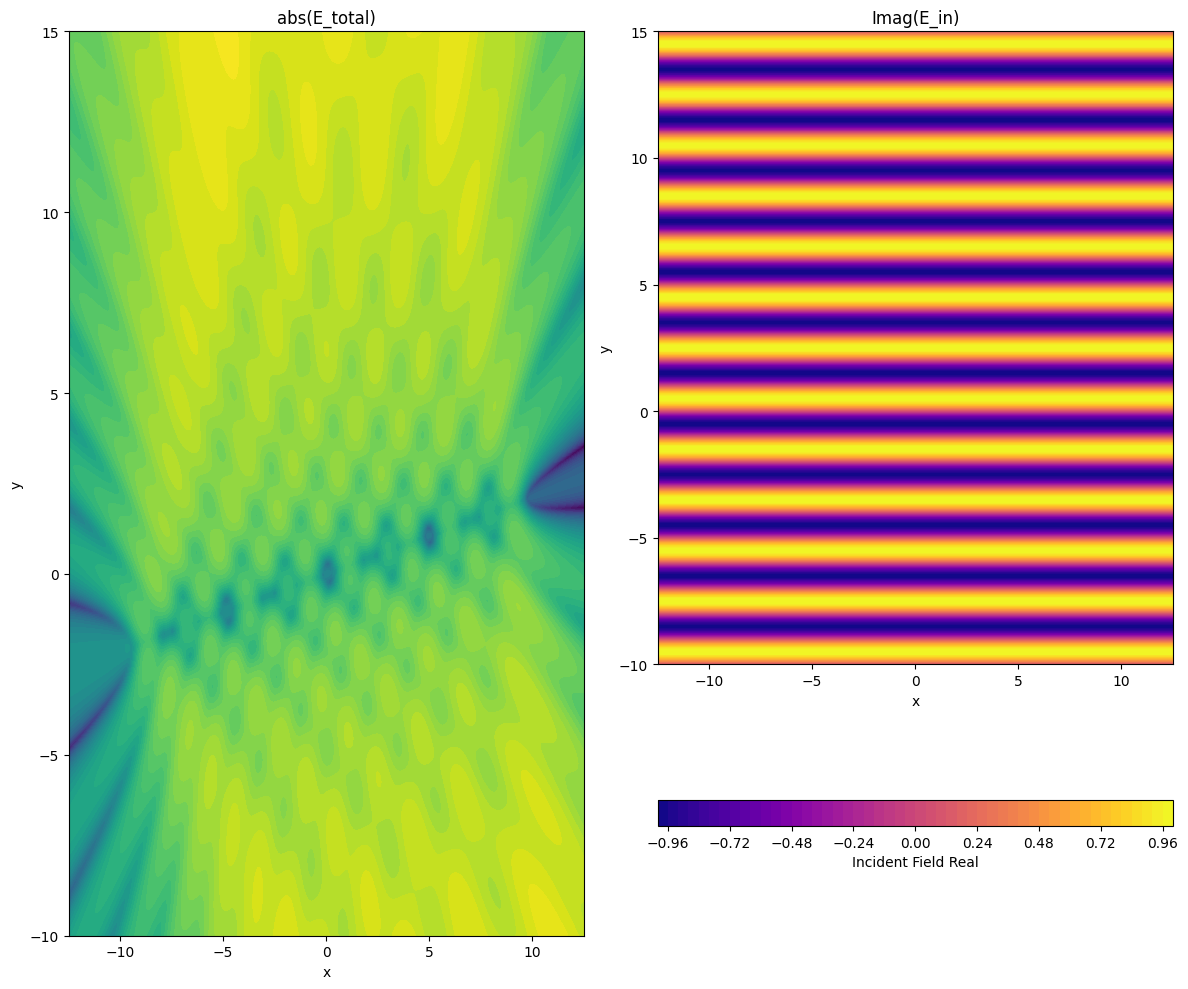

In [13]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot the real part of the total reflected field
plt.subplot(1, 2, 1)
plt.contourf(sim_one_mirror.X, sim_one_mirror.Y, np.log(np.abs(E_total)), levels=50, cmap='viridis')
plt.title('abs(E_total)')
plt.xlabel('x')
plt.ylabel('y')

# Plot the imaginary part of the total reflected field
plt.subplot(1, 2, 2)
plt.contourf(sim_one_mirror.X, sim_one_mirror.Y, np.imag((sim_one_mirror.E_incident)), levels=50, cmap='plasma')
plt.colorbar(label='Incident Field Real', location="bottom")
plt.title('Imag(E_in)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()